In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings 

In [2]:
warnings.filterwarnings('ignore')

## Apa itu Supervised Learning?
Supervised learning adalah suatu pendekatan dalam pembuatan AI. Disebut “supervised” karena dalam pendekatan ini, machine learning dilatih untuk **mengenali pola antara input data dan label output**.Data Berlabel adalah data yang berisi Fitur (variabel X) dan Target (variabel y)

#### Contoh Kasus
- Memprediksi angka harapan hidup suatu negara berdasarkan populasi dan GDP
- Mengklasifikasikan spesies bunga iris
- Memprediksi resiko penyakit jantung (1 jika positif, 0 jika negatif)
- Memprediksi kepuasan pelanggan suatu maskapai pesawat (0 jika tidak puas, 1 jika netral,2 jika sangat puas)


===============================================================================================================================

# Klasifikasi

Klasifikasi adalah jenis supervised learning di mana algoritma belajar dari data untuk memprediksi hasil atau peristiwa di masa depan.

**Algoritma klasifikasi digunakan untuk memprediksi hasil diskrit**, jika hasil dapat mengambil dua kemungkinan nilai seperti Benar atau Salah, Default atau Tidak Default, Ya atau Tidak, dikenal sebagai Klasifikasi Biner. Ketika hasilnya mengandung lebih dari dua nilai yang mungkin, itu dikenal sebagai Klasifikasi Multiklasifikasi.
Beberapa algortima klasifikasi yaitu :
- Logistic Regression
- Decision Tree Classifier
- KNN Classifier
- Naïve Bayes	

## Read Data

Dataset yang digunakan adalah dataset **bunga iris** yang didalamnya terdiri **4 fitur** dari **50 sample** 3 spesies bunga iris (Iris setosa,Iris Virginica, dan Iris versicolor). Dataset ini sangat umum digunakan untuk masalah **klasifikasi**

**Feature :**
- sepal_lenght (Panjang Kelopak)
- sepal_width (Lebar Kelopak)
- petal_lenght (Panjang Mahkota)
- petal_widht (Lebar Mahkota)

**Target :**
- species (Iris-Setosa, Iris-Virginica, Iris-Versicolor)

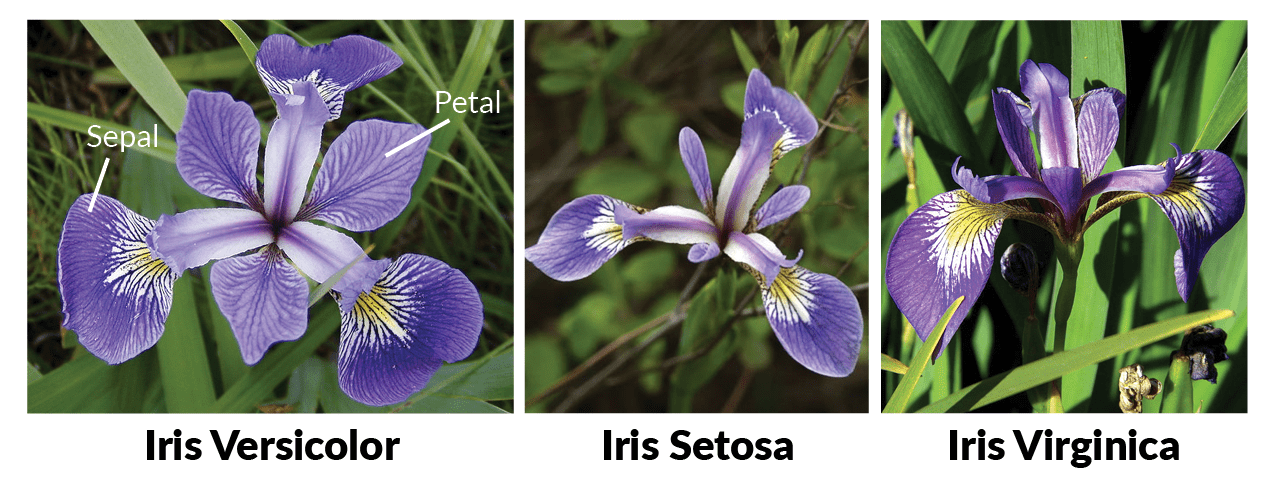

In [3]:
df = sns.load_dataset('iris')
# df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/Iris_Data.csv")

# Preview Data

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

,species,count
0,setosa,50
1,versicolor,50
2,virginica,50


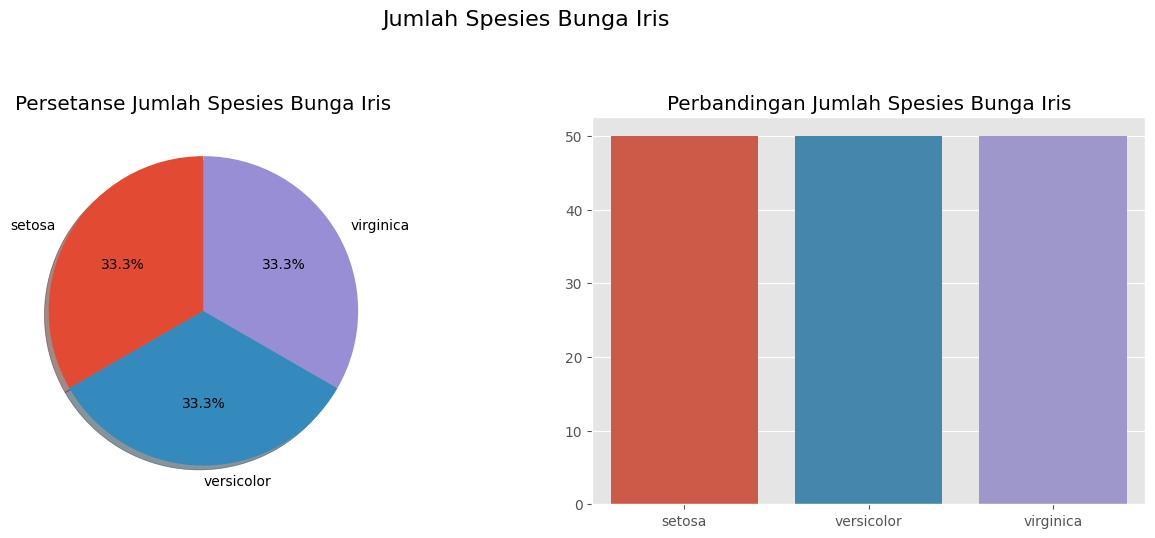

In [15]:
#Gunakan 'style' ggplot
plt.style.use('ggplot')

speciesGroup = df["species"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(speciesGroup['count'],labels=speciesGroup['species'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("Persetanse Jumlah Spesies Bunga Iris")


X_index = list(speciesGroup['species'])
y_species = list(speciesGroup['count'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan Jumlah Spesies Bunga Iris")

fig.subplots_adjust(top=0.8)
plt.suptitle("Jumlah Spesies Bunga Iris",size=16)
plt.show()

Tiap spesies memiliki jumlah = 50

Tiap spesies memiliki jumlah yang seimbang didalam data (Balance) sehingga tidak terjadinya *class imbalance*

===============================================================================================================================

<Figure size 2000x1500 with 0 Axes>

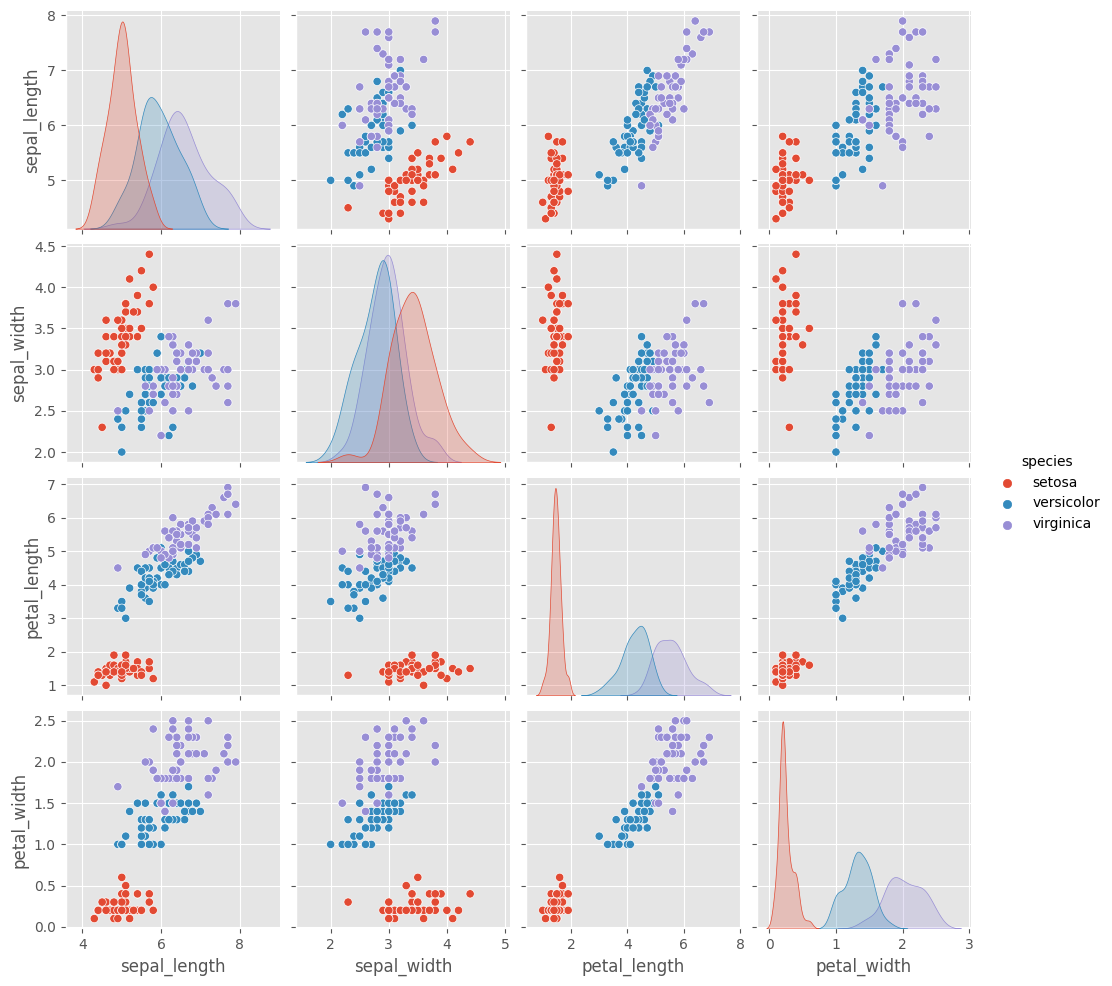

In [16]:


plt.figure(figsize=(20,15))
sns.pairplot(df,hue="species")
plt.show()

Terdapat perbedaan yang lebar diantara spesies **Iris-setosa** terhadap spesies lainnya, namun perbedaan mulai kabur saat membandingkan spesies **Iris-Versicolor** dengan spesies **Iris-Virginica**

===============================================================================================================================

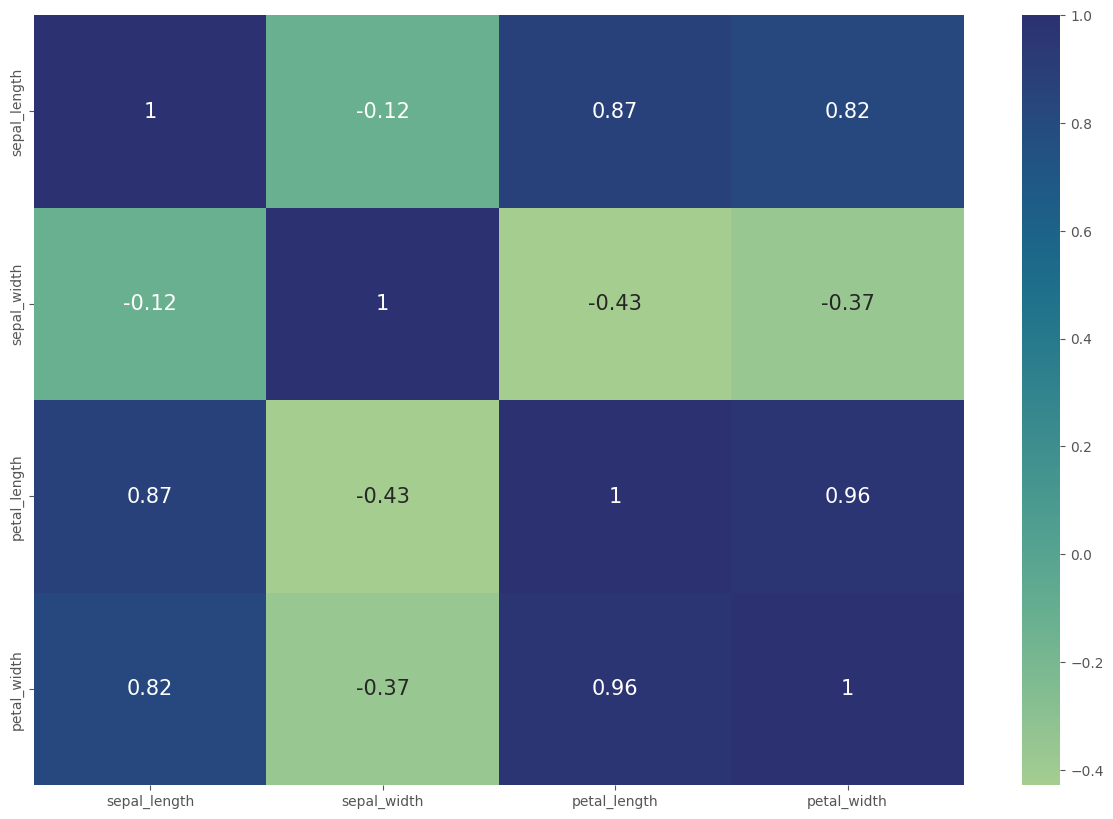

In [18]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(numeric_only=True),cmap='crest',annot=True,annot_kws={"size":15})
plt.show()

# Preprocessing

### Split Data

In [19]:
X = df.iloc[:,:-1] #Feature
y = df.iloc[:,-1] #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scale Data

In [20]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# Modelling Data

### KNN

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train_std,y_train)

knn_pred = knn.predict(X_test_std)
acc_knn = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN dengan default paramater :", round(acc_knn,3))

Akurasi algoritma KNN dengan default paramater : 0.933


#### Find Optimal K

In [22]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

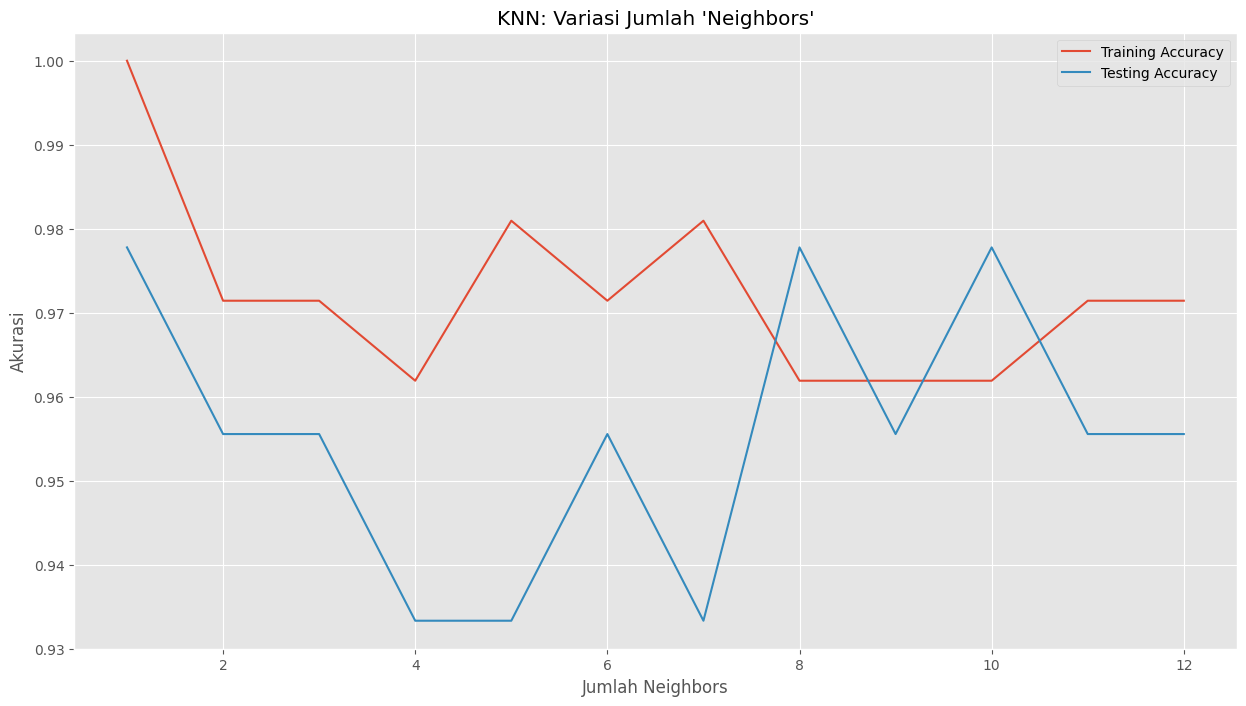

In [23]:
plt.figure(figsize=(15,8))
plt.title("KNN: Variasi Jumlah 'Neighbors'")


plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Jumlah Neighbors")
plt.ylabel("Akurasi")

# Display the plot
plt.show()

### Decision Tree Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
dt = clf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
acc_dt = accuracy_score(y_test, dt_pred)
print("Akurasi algoritma Decision Tree dengan default paramater :", round(acc_dt,3))

Akurasi algoritma Decision Tree dengan default paramater : 0.933


#### Visualisasi Bentuk Decision Tree

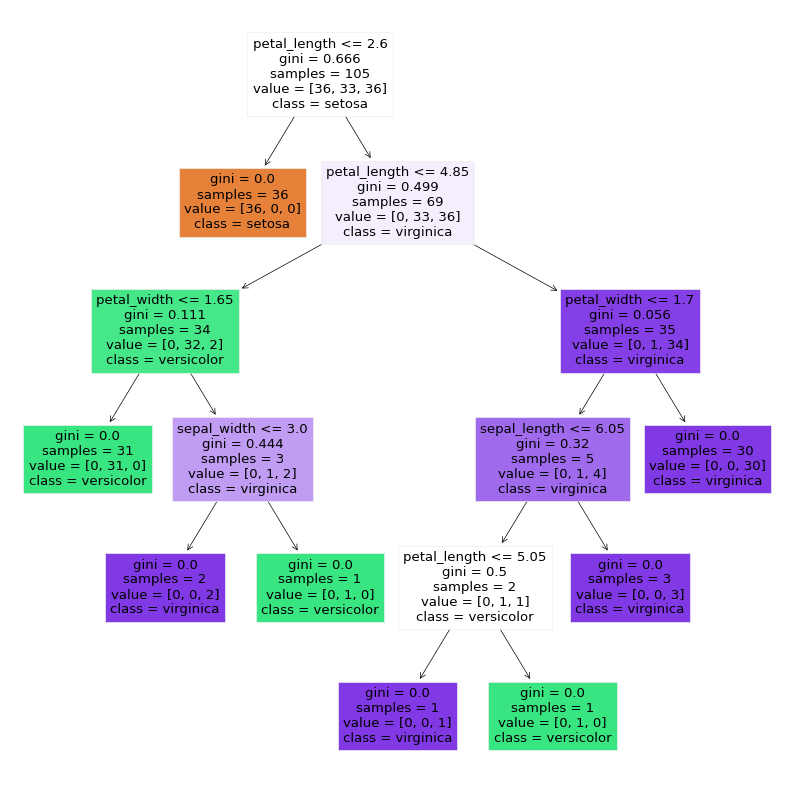

In [25]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X.columns,filled=True,class_names=y.unique())
plt.show()

#### Melihat Feature Importance dari sebuah fitur

In [26]:
f_impt= pd.DataFrame(dt.feature_importances_,index=df.columns[:-1])
f_impt = f_impt.sort_values(by=0)
f_impt

,0
sepal_length,0.008578
sepal_width,0.019063
petal_width,0.039664
petal_length,0.932694


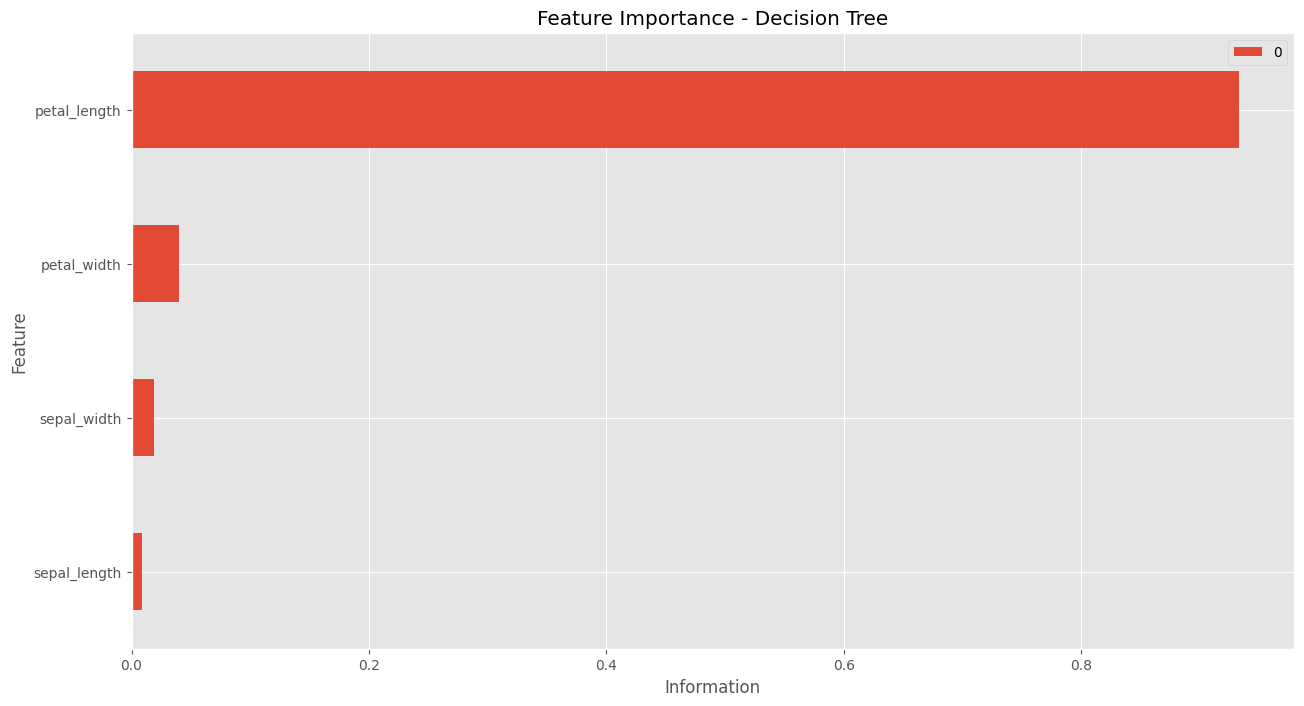

In [27]:
f_impt.plot(kind='barh',figsize=(15,8))
plt.title("Feature Importance - Decision Tree")
plt.ylabel("Feature")
plt.xlabel("Information")
plt.show()

Atribut **petal_width** mempunyai "Informasi" paling tinggi dalam melakukan klasifikasi

### Support Vector Machine

In [28]:
from sklearn.svm import SVC

#Latih model dari SVM Classifier
svc = SVC()
svc.fit(X_train_std,y_train)

#Akurasi model untuk X_test
svc_pred = svc.predict(X_test_std)
acc_svc = accuracy_score(y_test, svc_pred)
print("Akurasi algoritma SVC dengan default paramater :", round(acc_svc,3))

Akurasi algoritma SVC dengan default paramater : 0.978


### Naive Bayes Classifer

In [29]:
from sklearn.naive_bayes import GaussianNB

#Latih model dari GaussianNB Classifier
gnb  = GaussianNB()
gnb.fit(X_train_std,y_train)

#Akurasi model untuk X_test
gnb_pred = gnb.predict(X_test_std)
acc_gnb = accuracy_score(y_test, gnb_pred)
print("Akurasi algoritma Naive Bayes dengan default paramater :", round(acc_gnb,3))

Akurasi algoritma Naive Bayes dengan default paramater : 0.956


### Bandingkan Algoritma

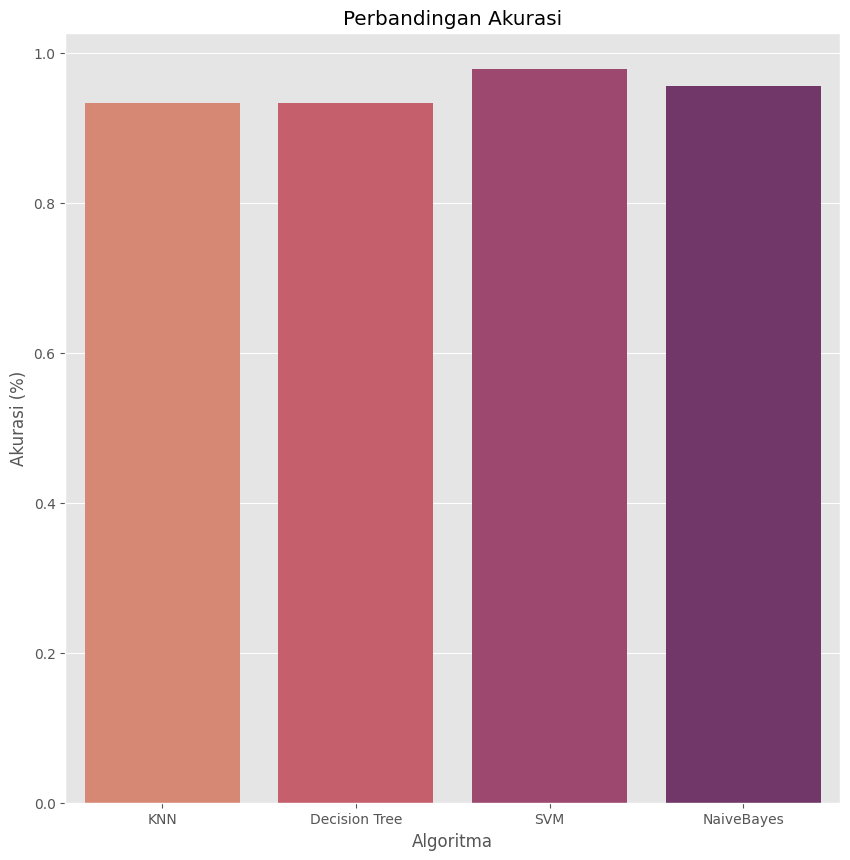

In [30]:
algoritma = ["KNN","Decision Tree","SVM","NaiveBayes"]
pred_value = [acc_knn,acc_dt,acc_svc,acc_gnb]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = pred_value,palette='flare')

plt.title("Perbandingan Akurasi")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

## Regresi

Regresi adalah jenis supervised learning di mana algoritma belajar dari data untuk memprediksi nilai kontinu seperti penjualan, gaji, berat, atau suhu.
Beberapa algoritma regresi yaitu:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor


### Simple Linear Regression

In [31]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

Memprediksi **panjang kelopak (sepal_length)** berdasarkan **panjang mahkota(petal_length)**

#### Split Data

In [32]:
X_Iris = df[["sepal_length"]] # Feature
y_Iris = df["petal_length"] # Target

#Split data
X_trainIris, X_testIris, y_trainIris, y_testIris = train_test_split(X_Iris, y_Iris, test_size=0.2)

In [33]:
#Buat objek dari regresi linear
reg = LinearRegression()

#Latih model
reg.fit(X_trainIris,y_trainIris)

LinearRegression()

#### Visualisasikan Hasil Prediksi Linear Regression

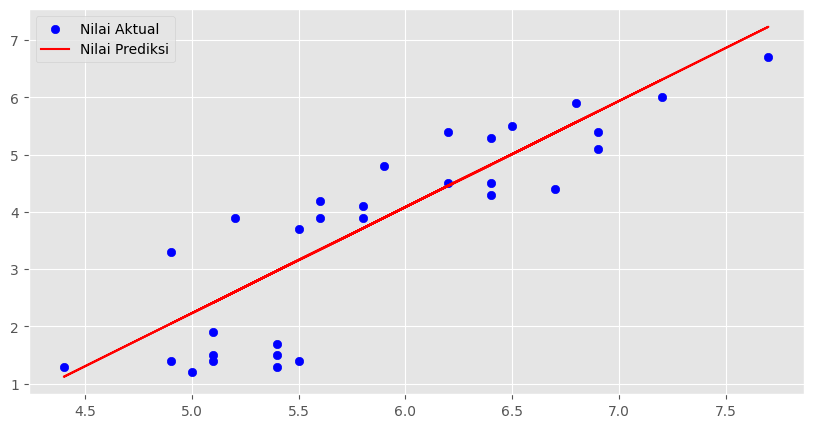

In [34]:
#Buat prediksi
y_pred = reg.predict(X_testIris)

plt.figure(figsize=(10,5))

plt.scatter(X_testIris, y_testIris, color="blue",label="Nilai Aktual")
plt.plot(X_testIris, y_pred, color="red",label="Nilai Prediksi")
plt.legend()
plt.show()

In [35]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Hitung R-squared
r_squared = reg.score(X_testIris, y_testIris)
mean_squared_error = mean_squared_error(y_pred,y_testIris)
# Print metrics
print("R^2    : {}".format(r_squared))
print("RMSE   : {}".format(mean_squared_error))

R^2    : 0.7398562744702293
RMSE   : 0.7559314186160864


**R square** merupakan suatu nilai yang memperlihatkan seberapa besar variabel independen  mempengaruhi variabel dependen. 

R squared merupakan **angka yang berkisar antara 0 sampai 1 yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen**.

Jadi semakin besar nilai **R squared** maka model kita semakin bagus dalam menangkap hubungan linearitas diantara feature dan target

# K - Fold Validation

**Cross validation** adalah suatu metode bertujuan untuk memperoleh hasil akurasi yang maksimal. Metode ini sering juga disebut dengan *k-fold cross validation* dimana percobaan sebanyak *k* kali untuk satu model dengan parameter yang sama

Fungsi dari penggunaan metode cross validation adalah
- Untuk mengetahui performa dari suatu model algoritma dengan melakukan percobaan sebanyak k kali
- Untuk menningkatkan tingkat performansi dari model tersebut
- Untuk mengolah data set dengan kelas yang seimbang

### K-Fold - Klasifkasi

In [36]:
from sklearn.model_selection import KFold, cross_val_score

#Buat objeck dari kflod
kf = KFold(n_splits=5, shuffle=True, random_state=5)

#### KNN

In [37]:
# Buat model algoritma yang akan dipakai
knn = KNeighborsClassifier()

# Hitung 5-fold cross-validation scores
knn_scores = cross_val_score(knn, X_train, y_train, cv=kf)

cv_knn = np.round(knn_scores.mean(),3)

print("Akurasi algoritma KNN dengan K-Fold Sebanyak 5 :", cv_knn)

Akurasi algoritma KNN dengan K-Fold Sebanyak 5 : 0.962


#### Decision Tree

In [38]:
# Buat model algoritma yang akan dipakai
dt = DecisionTreeClassifier()

# Hitung 5-fold cross-validation scores
dt_scores = cross_val_score(dt, X_train, y_train, cv=kf)

cv_dt = np.round(dt_scores.mean(),3)

print("Akurasi algoritma Decision Tree dengan K-Fold Sebanyak 5 :", cv_dt)

Akurasi algoritma Decision Tree dengan K-Fold Sebanyak 5 : 0.905


#### Naive Bayes

In [39]:
# Buat model algoritma yang akan dipakai
gnb = GaussianNB()

# Hitung 5-fold cross-validation scores
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=kf)

cv_gnb = np.round(gnb_scores.mean(),3)

print("Akurasi algoritma Naive Bayes dengan K-Fold Sebanyak 5 :", cv_gnb)

Akurasi algoritma Naive Bayes dengan K-Fold Sebanyak 5 : 0.943


#### SVM

In [40]:
# Buat model algoritma yang akan dipakai
svc = SVC()

# Hitung 5-fold cross-validation scores
svc_scores = cross_val_score(svc, X_train, y_train, cv=kf)

cv_svc = np.round(svc_scores.mean(),3)

print("Akurasi algoritma SVM dengan K-Fold Sebanyak 5 :", cv_svc)

Akurasi algoritma SVM dengan K-Fold Sebanyak 5 : 0.962


#### Bandingkan Algoritma

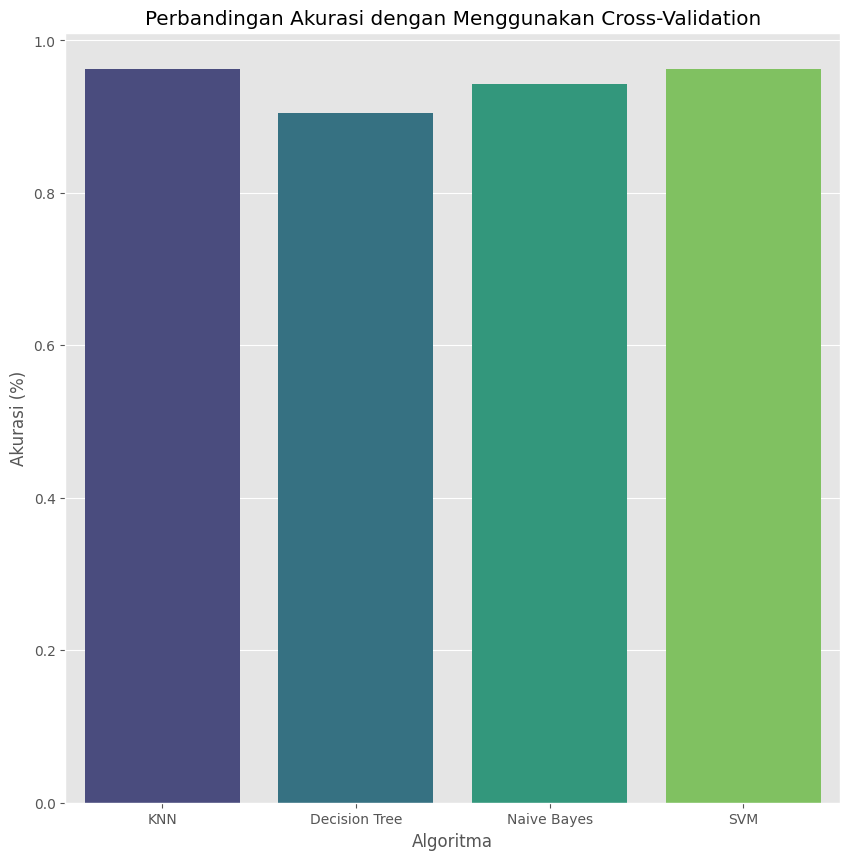

In [41]:
labels = ["KNN","Decision Tree","Naive Bayes","SVM"]
values = [cv_knn,cv_dt,cv_gnb,cv_svc]

plt.figure(figsize=(10,10))

sns.barplot(x= labels,y = values,palette='viridis')

plt.title("Perbandingan Akurasi dengan Menggunakan Cross-Validation")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

### K-Fold - Regresi

In [42]:
#Buat objeck dari kflod
kf = KFold(n_splits=5, shuffle=True, random_state=5)

#### Simple Linear Regression

In [43]:
X_Iris = df[["sepal_length"]] # Feature
y_Iris = df["petal_length"] # Target

#Split data
X_trainIris, X_testIris, y_trainIris, y_testIris = train_test_split(X_Iris, y_Iris, test_size=0.2)

#Buat objek dari regresi linear
reg = LinearRegression()

# Hitung 5-fold cross-validation scores
lr_scores = cross_val_score(reg, X_trainIris, y_trainIris, cv=kf)

csv_lr = np.round(lr_scores.mean(),3)

print("Nilair R^2 algoritma Simple Linear Regression dengan K-Fold Sebanyak 5 :", csv_lr)

Nilair R^2 algoritma Simple Linear Regression dengan K-Fold Sebanyak 5 : 0.712


# Confusion Matrix

*Confusion matrix* adalah sebuah tabel yang sering digunakan untuk mengukur kinerja dari model klasifikasi di machine learning. Tabel ini menggambarkan lebih detail tentang jumlah data yang diklasifikasikan dengan benar maupun salah.

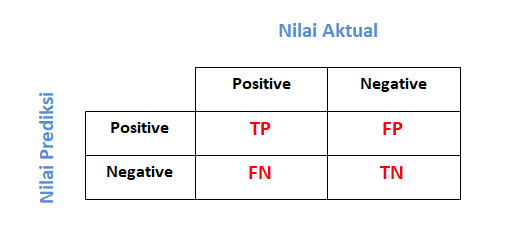


- **True Positive (TP)** : Jumlah data yang bernilai Positif dan diprediksi benar sebagai Positif.
- **False Positive (FP)** : Jumlah data yang bernilai Negatif tetapi diprediksi sebagai Positif.
- **False Negative (FN)** : Jumlah data yang bernilai Positif tetapi diprediksi sebagai Negatif.
- **True Negative (TN)** : Jumlah data yang bernilai Negatif dan diprediksi benar sebagai Negatif.

In [44]:
#Import library
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

### KNN

Confusion matrix

 [[14  0  0]
 [ 0 15  2]
 [ 0  1 13]]


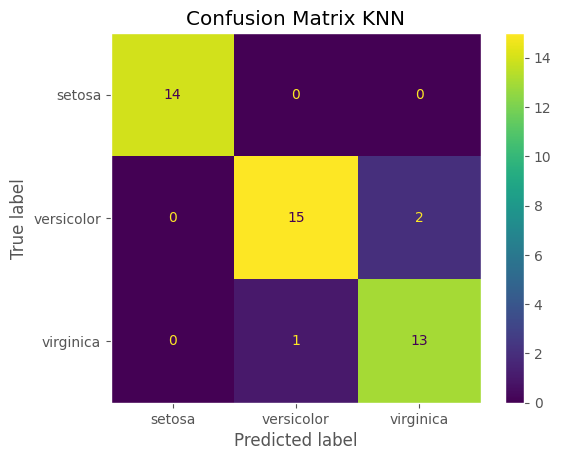

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix\n\n', cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
disp.plot()

plt.title("Confusion Matrix KNN")
plt.grid(False)

In [46]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.88      0.91        17
   virginica       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



### Decision Tree

Confusion matrix

 [[14  0  0]
 [ 0 14  3]
 [ 0  0 14]]


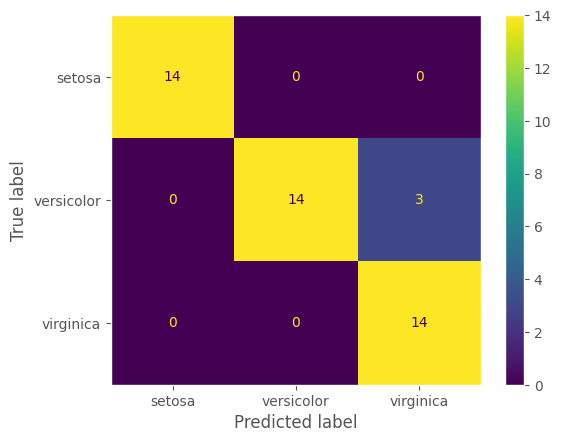

In [47]:
clf = DecisionTreeClassifier()
dt = clf.fit(X_train, y_train)


dt_pred = dt.predict(X_test)

dt_cm = confusion_matrix(y_test, dt_pred)
print('Confusion matrix\n\n', dt_cm)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,display_labels=knn.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [48]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      0.82      0.90        17
   virginica       0.82      1.00      0.90        14

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.95      0.93      0.93        45



# Hyperparameter Tuning
*Hyperparameter tuning* adalah tantangan dalam memilih kumpulan *hyperparameter* yang sesuai untuk algoritma pembelajaran. *Hyperparameter tuning* adalah nilai untuk parameter yang digunakan untuk mempengaruhi proses pembelajaran.

Contoh *hyperparameter*:
- **KNN** (n_neighbors)
- **Decision Tree** (min_sample_leaf,min_sample_split, max_depth)
- **SVM** (kernel)

### Hyperparameter Tuning - KNN

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#Buat model algoritma
modelKNN = KNeighborsClassifier()


#Buat dictionary yang berisi parameter dari algoritma
param_grid = { "n_neighbors" :[i for i in range(0,8)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

In [51]:
#Print parameter terbaik
print(gs.best_params_)

{'n_neighbors': 7}


In [52]:
print("Akurasi Training Set : ",(gs.score(X_train,y_train)*100),"%")

Akurasi Training Set :  98.09523809523809 %
